# Bayesian Bootstrap

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

An implementation in Python of tha basic functionality of the function `bayes_boot` described [here](http://www.sumsar.net/blog/2015/07/easy-bayesian-bootstrap-in-r/).

First we need a Dirichlet sampling function:

In [119]:
def dirichlet_sample(dimension, size=1): 
    sample = np.random.exponential(1, (size, dimension))
    row_sums = sample.sum(axis=1)
    return sample/row_sums[:, np.newaxis]

Then our bootstrap built on top of the Dirichlet sampling:

In [120]:
def bayes_boot(data, size, sample_size, function=lambda x: x):
    dimension = len(data)
    weights = dirichlet_sample(dimension, size)
    samples = np.array([function(np.random.choice(data, 
                                                  size=sample_size, 
                                                  replace=True, 
                                                  p=w)) 
                        for w in weights])
    return samples

Let us now use the function for estimating a credible interval for the median and mean of the height of American presidents:

In [121]:
presidents = pd.read_csv('http://www.sumsar.net/files/posts/2015-07-14-easy-bayesian-bootstrap-in-r/american_presidents.csv')

In [122]:
heights = list(presidents.height_cm)

(160, 195)

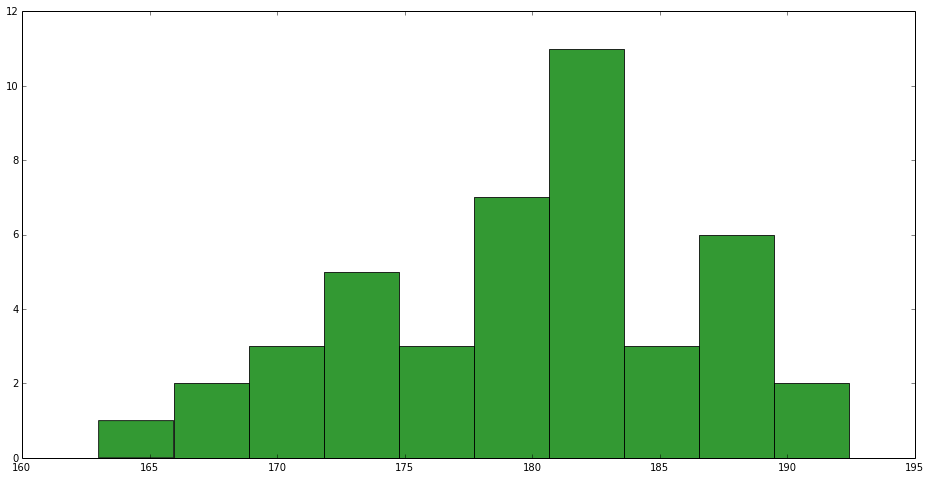

In [129]:
_ = plt.hist(heights, color='green',alpha=0.8)
plt.xlim([160, 195])

Posterior of the median:

95% credible interval for the median:
[ 178.  183.]


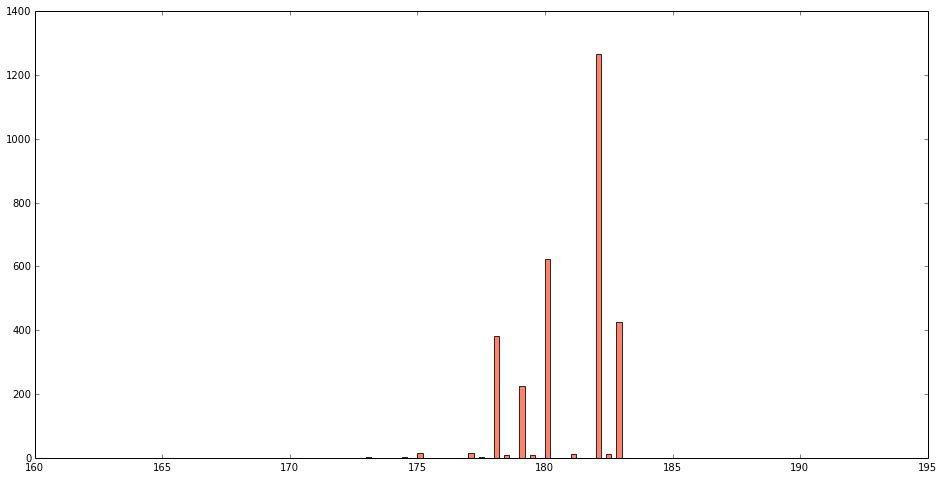

In [135]:
bayesian_median_heights = bayes_boot(heights, 3000, 1000, np.median)
_ = plt.hist(bayesian_median_heights, 50, color='tomato',alpha=0.8)
plt.xlim([160, 195])
print '95% credible interval for the median:'
print np.percentile(bayesian_median_heights, [2.5, 97.5])

Posterior of the mean:

95% credible interval for the mean:
[ 177.638305  181.811865]


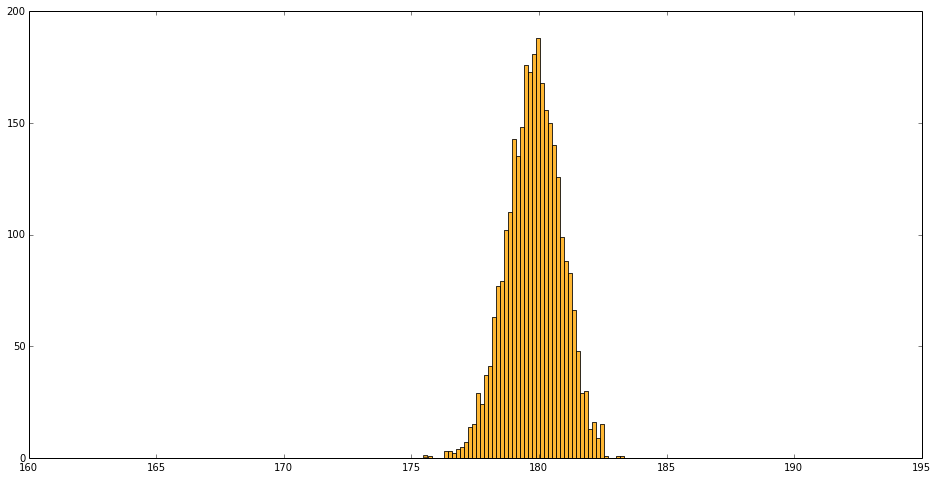

In [132]:
bayesian_mean_heights = bayes_boot(heights, 3000, 1000, np.mean)
_ = plt.hist(bayesian_mean_heights, 50, color='orange',alpha=0.8)
plt.xlim([160, 195])
print '95% credible interval for the mean:'
print np.percentile(bayesian_mean_heights, [2.5, 97.5])